# BLIP - Image Captioning

https://huggingface.co/docs/transformers/en/model_doc/blip

BLIP is a model that is able to perform various multi-modal tasks including:

    Visual Question Answering
    Image-Text retrieval (Image-text matching)
    Image Captioning

Vision-Language Pre-training (VLP) has advanced the performance for many vision-language tasks. BLIP effectively utilizes the noisy web data by bootstrapping the captions, where a captioner generates synthetic captions and a filter removes the noisy ones. We achieve state-of-the-art results on a wide range of vision-language tasks, such as image-text retrieval (+2.7% in average recall@1), image captioning (+2.8% in CIDEr), and VQA (+1.6% in VQA score). BLIP also demonstrates strong generalization ability when directly transferred to videolanguage tasks in a zero-shot manner. Code, models, and datasets are released.

In [6]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

In [2]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [3]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

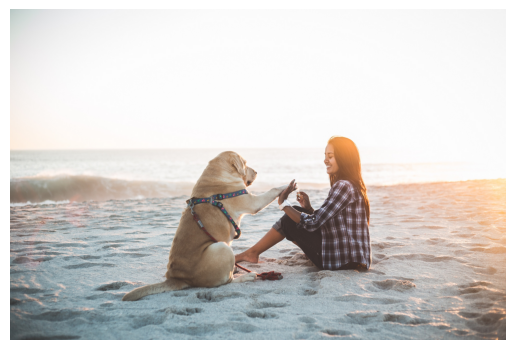

In [7]:
# Display the image
plt.imshow(raw_image)
plt.axis('off')
plt.show()

In [4]:
# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


/opt/homebrew/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone
